## Data Exploration

**Step 1: Setting up the environment**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import kagglehub

In [6]:
plt.style.use('default')
sns.set_palette("husl")

In [7]:
# Download dataset
path = kagglehub.dataset_download("prajwaldongre/loan-application-and-transaction-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lvand\.cache\kagglehub\datasets\prajwaldongre\loan-application-and-transaction-fraud-detection\versions\1


**Step 2: Load and inspect dataset structure**

In [8]:
loan_apps_path = os.path.join(path, 'loan_applications.csv')
transactions_path = os.path.join(path, 'transactions.csv')

print("Loading datasets...")
loan_applications = pd.read_csv(loan_apps_path)
transactions = pd.read_csv(transactions_path)

print("Dataset shapes:")
print(f"Loan Applications: {loan_applications.shape}")
print(f"Transactions: {transactions.shape}")

print("\nLoan Applications columns:")
print(loan_applications.columns.tolist())

print("\nTransactions columns:")
print(transactions.columns.tolist())

Loading datasets...
Dataset shapes:
Loan Applications: (50000, 21)
Transactions: (50000, 16)

Loan Applications columns:
['application_id', 'customer_id', 'application_date', 'loan_type', 'loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered', 'purpose_of_loan', 'employment_status', 'monthly_income', 'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio', 'property_ownership_status', 'residential_address', 'applicant_age', 'gender', 'number_of_dependents', 'loan_status', 'fraud_flag', 'fraud_type']

Transactions columns:
['transaction_id', 'customer_id', 'transaction_date', 'transaction_type', 'transaction_amount', 'merchant_category', 'merchant_name', 'transaction_location', 'account_balance_after_transaction', 'is_international_transaction', 'device_used', 'ip_address', 'transaction_status', 'transaction_source_destination', 'transaction_notes', 'fraud_flag']


**Step 3: Dataset information**

Get detailed information about data types, missing values, and statistics.

In [11]:
print("=== LOAN APPLICATIONS DATASET ===")
print("\nData types:")
print(loan_applications.dtypes)

print("\nMissing values:")
print(loan_applications.isnull().sum())

print("\nBasic statistics:")
print(loan_applications.describe())

print("\n=== TRANSACTIONS DATASET ===")
print("\nData types:")
print(transactions.dtypes)

print("\nMissing values:")
print(transactions.isnull().sum())

print("\nBasic statistics:")
print(transactions.describe())

=== LOAN APPLICATIONS DATASET ===

Data types:
application_id                object
customer_id                   object
application_date              object
loan_type                     object
loan_amount_requested        float64
loan_tenure_months             int64
interest_rate_offered        float64
purpose_of_loan               object
employment_status             object
monthly_income               float64
cibil_score                    int64
existing_emis_monthly        float64
debt_to_income_ratio         float64
property_ownership_status     object
residential_address           object
applicant_age                  int64
gender                        object
number_of_dependents           int64
loan_status                   object
fraud_flag                     int64
fraud_type                    object
dtype: object

Missing values:
application_id                   0
customer_id                      0
application_date                 0
loan_type                        0
loan_

**Step 4: Examine fraud distribution**

Analyzes the fraud rate in the loan_applications.csv and transactions.csv. datasets.

In [12]:
# Loan applications fraud distribution
loan_fraud_dist = loan_applications['fraud_flag'].value_counts()
loan_fraud_pct = loan_applications['fraud_flag'].value_counts(normalize=True) * 100

print("Loan Applications Fraud Distribution:")
print(f"Non-fraud (0): {loan_fraud_dist[0]} ({loan_fraud_pct[0]:.2f}%)")
print(f"Fraud (1): {loan_fraud_dist[1]} ({loan_fraud_pct[1]:.2f}%)")

# Transaction fraud distribution
trans_fraud_dist = transactions['fraud_flag'].value_counts()
trans_fraud_pct = transactions['fraud_flag'].value_counts(normalize=True) * 100

print("\nTransactions Fraud Distribution:")
print(f"Non-fraud (0): {trans_fraud_dist[0]} ({trans_fraud_pct[0]:.2f}%)")
print(f"Fraud (1): {trans_fraud_dist[1]} ({trans_fraud_pct[1]:.2f}%)")

Loan Applications Fraud Distribution:
Non-fraud (0): 48974 (97.95%)
Fraud (1): 1026 (2.05%)

Transactions Fraud Distribution:
Non-fraud (0): 49498 (99.00%)
Fraud (1): 502 (1.00%)


**Step 5: Visualize fraud distribution**

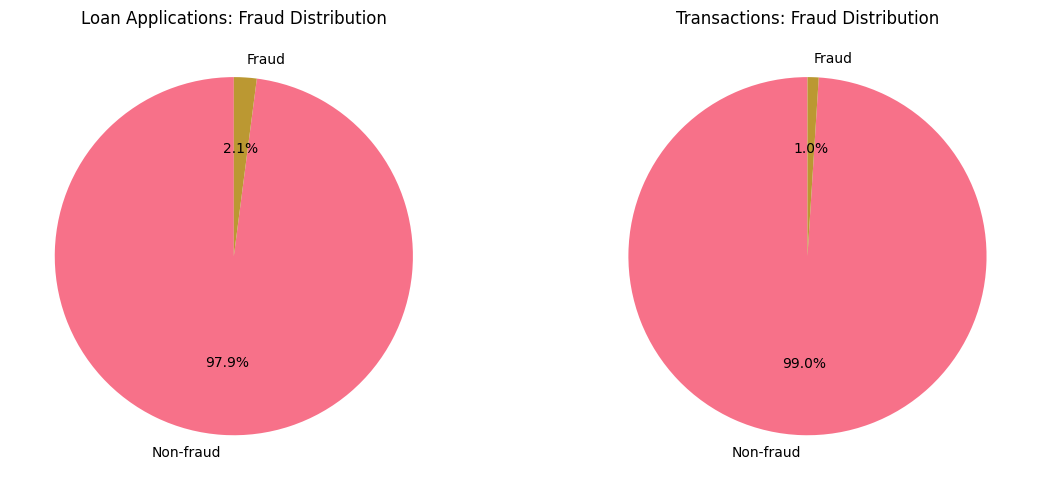

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loan applications fraud distribution
ax1.pie(loan_fraud_dist.values, labels=['Non-fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Loan Applications: Fraud Distribution')

# Transaction fraud distribution
ax2.pie(trans_fraud_dist.values, labels=['Non-fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Transactions: Fraud Distribution')

plt.tight_layout()
plt.show()

**Step 6: Examine key features for modelling**

Explores important features that will be used in the fraud detection model.

In [14]:
print("=== KEY FEATURES ANALYSIS ===")

# Loan applications - examine key numerical features
print("Loan Applications - Key numerical features:")
numerical_cols = loan_applications.select_dtypes(include=[np.number]).columns
print(numerical_cols.tolist())

# Show sample data
print("\nSample loan application records:")
print(loan_applications.head())

print("\nTransactions - Key numerical features:")
trans_numerical_cols = transactions.select_dtypes(include=[np.number]).columns
print(trans_numerical_cols.tolist())

print("\nSample transaction records:")
print(transactions.head())

=== KEY FEATURES ANALYSIS ===
Loan Applications - Key numerical features:
['loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered', 'monthly_income', 'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio', 'applicant_age', 'number_of_dependents', 'fraud_flag']

Sample loan application records:
                         application_id customer_id application_date  \
0  c8bf0bea-70e6-4870-9125-41b8210c527f  CUST109427       2023-04-09   
1  91224cec-3544-4bc7-ac15-a9792da54c02  CUST106146       2023-09-23   
2  4efcd02d-4a03-4ab7-9bd1-0ff430493d0c  CUST100674       2023-05-22   
3  a61337d4-ba04-4a68-b492-2cb8266e6ed7  CUST106466       2024-07-09   
4  a8d1639e-170b-41b2-826a-55c7dae38d16  CUST112319       2023-11-20   

        loan_type  loan_amount_requested  loan_tenure_months  \
0   Business Loan               604000.0                  12   
1        Car Loan               100000.0                 240   
2  Education Loan               431000.0                 

**Step 7. Customer linkage analysis**

Analyze how loan applications and transactions are linked to customer_id.

In [15]:
loan_customers = set(loan_applications['customer_id'].unique())
trans_customers = set(transactions['customer_id'].unique())

print(f"Unique customers in loan applications: {len(loan_customers)}")
print(f"Unique customers in transactions: {len(trans_customers)}")
print(f"Overlapping customers: {len(loan_customers.intersection(trans_customers))}")

# Check transaction frequency per customer
trans_per_customer = transactions.groupby('customer_id').size()
print(f"\nTransactions per customer statistics:")
print(trans_per_customer.describe())

Unique customers in loan applications: 18314
Unique customers in transactions: 18318
Overlapping customers: 16766

Transactions per customer statistics:
count    18318.000000
mean         2.729556
std          1.452309
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
dtype: float64


**Step 8: Feature correlation analysis**

Analyze correlations in numerical features to understand relationships.

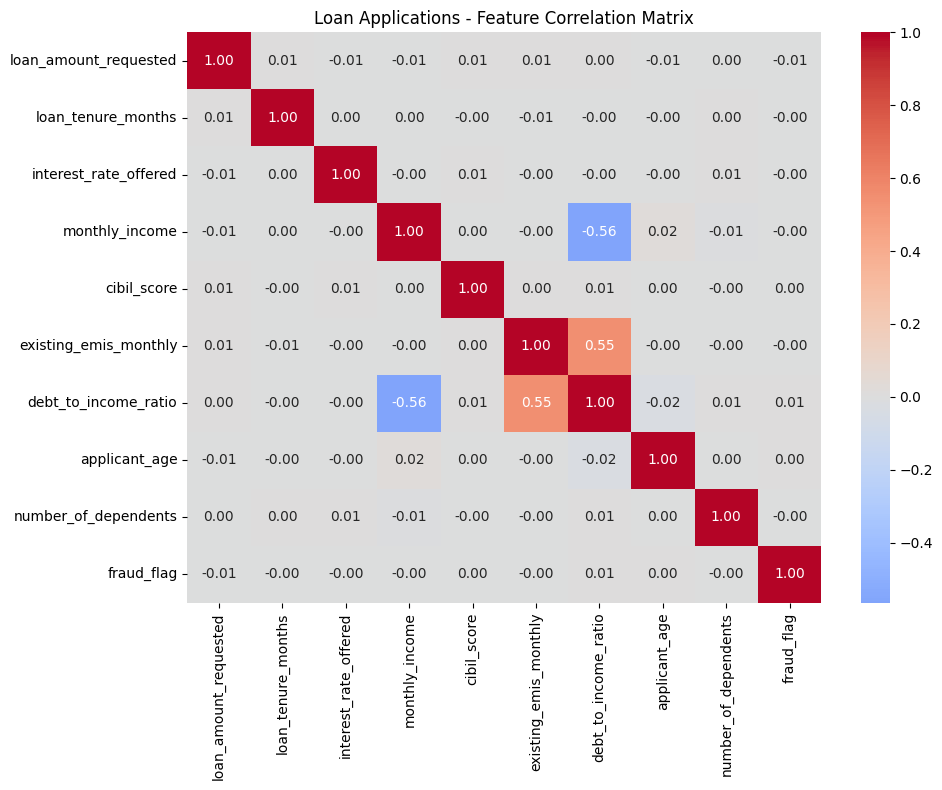

Correlation with fraud_flag in loan applications:
fraud_flag               1.000000
debt_to_income_ratio     0.005644
applicant_age            0.004846
cibil_score              0.001095
loan_tenure_months      -0.000484
existing_emis_monthly   -0.000631
interest_rate_offered   -0.001440
monthly_income          -0.001949
number_of_dependents    -0.004166
loan_amount_requested   -0.005917
Name: fraud_flag, dtype: float64


In [16]:
loan_numerical = loan_applications.select_dtypes(include=[np.number])
loan_corr = loan_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(loan_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Loan Applications - Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlation with fraud flag specifically
print("Correlation with fraud_flag in loan applications:")
fraud_corr = loan_corr['fraud_flag'].sort_values(ascending=False)
print(fraud_corr)

All correlations with the fraud_flag are weak, below <0.1. This suggests there are no obvious patterns to be discovered. The highest correlation with the fraud_flag is with debt_to_income_ratio, suggesting financial stress could be a factor.

**Step 9: Create monthly splits**

Split the data into 12 monthly chunks for the MLOps pipeline.

In [17]:
# Create data directory structure
data_dir = Path('data')
monthly_dir = data_dir / 'monthly'
raw_dir = data_dir / 'raw'

# Create directories
raw_dir.mkdir(parents=True, exist_ok=True)
monthly_dir.mkdir(parents=True, exist_ok=True)

# Copy original files to raw directory
loan_applications.to_csv(raw_dir / 'loan_applications.csv', index=False)
transactions.to_csv(raw_dir / 'transactions.csv', index=False)

# Split loan applications into 12 monthly chunks
np.random.seed(42)  # For reproducible splits
shuffled_loans = loan_applications.sample(frac=1).reset_index(drop=True)

# Calculate chunk sizes
total_loans = len(shuffled_loans)
chunk_size = total_loans // 12
remaining = total_loans % 12

print(f"Total loan applications: {total_loans}")
print(f"Base chunk size: {chunk_size}")
print(f"Remaining records: {remaining}")

# Create 12 monthly splits
for month in range(1, 13):
    month_dir = monthly_dir / f"{month:02d}"
    month_dir.mkdir(exist_ok=True)

    # Calculate start and end indices
    start_idx = (month - 1) * chunk_size
    if month <= remaining:
        end_idx = start_idx + chunk_size + 1
    else:
        end_idx = start_idx + chunk_size

    # Extract month data
    month_loans = shuffled_loans.iloc[start_idx:end_idx].copy()

    # Get corresponding customer transactions for this month
    month_customers = month_loans['customer_id'].unique()
    month_transactions = transactions[transactions['customer_id'].isin(month_customers)].copy()

    # Save monthly data
    month_loans.to_csv(month_dir / 'loan_applications.csv', index=False)
    month_transactions.to_csv(month_dir / 'transactions.csv', index=False)

    fraud_rate = month_loans['fraud_flag'].mean() * 100
    print(f"Month {month:02d}: {len(month_loans)} loans, {len(month_transactions)} transactions, {fraud_rate:.1f}% fraud rate")

print("\nMonthly data splits created successfully!")

Total loan applications: 50000
Base chunk size: 4166
Remaining records: 8
Month 01: 4167 loans, 9375 transactions, 1.9% fraud rate
Month 02: 4167 loans, 9313 transactions, 1.8% fraud rate
Month 03: 4167 loans, 9392 transactions, 2.0% fraud rate
Month 04: 4167 loans, 9363 transactions, 1.6% fraud rate
Month 05: 4167 loans, 9401 transactions, 2.0% fraud rate
Month 06: 4167 loans, 9401 transactions, 1.8% fraud rate
Month 07: 4167 loans, 9548 transactions, 2.3% fraud rate
Month 08: 4167 loans, 9436 transactions, 2.1% fraud rate
Month 09: 4166 loans, 9443 transactions, 2.4% fraud rate
Month 10: 4166 loans, 9592 transactions, 2.0% fraud rate
Month 11: 4166 loans, 9501 transactions, 1.9% fraud rate
Month 12: 4166 loans, 9522 transactions, 2.8% fraud rate

Monthly data splits created successfully!


## Data Summary

In [18]:
print("Dataset Overview:")
print(f"- Loan Applications: {loan_applications.shape[0]} records, {loan_applications.shape[1]} features")
print(f"- Transactions: {transactions.shape[0]} records, {transactions.shape[1]} features")

print(f"\nFraud Rates:")
print(f"- Loan Applications: {loan_applications['fraud_flag'].mean()*100:.1f}%")
print(f"- Transactions: {transactions['fraud_flag'].mean()*100:.1f}%")

print(f"\nKey Features Available:")
print("- Customer demographics and financial information")
print("- Loan specifics (amount, term, purpose)")
print("- Transaction patterns and amounts")
print("- Geographic and temporal information")

print(f"\nData Quality:")
missing_loans = loan_applications.isnull().sum().sum()
missing_trans = transactions.isnull().sum().sum()
print(f"- Missing values in loans: {missing_loans}")
print(f"- Missing values in transactions: {missing_trans}")

Dataset Overview:
- Loan Applications: 50000 records, 21 features
- Transactions: 50000 records, 16 features

Fraud Rates:
- Loan Applications: 2.1%
- Transactions: 1.0%

Key Features Available:
- Customer demographics and financial information
- Loan specifics (amount, term, purpose)
- Transaction patterns and amounts
- Geographic and temporal information

Data Quality:
- Missing values in loans: 48974
- Missing values in transactions: 0
